# (1) Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
import pandas as pd

#(3)
from imblearn.over_sampling import SMOTE

#(4)
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier  
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_predict

# (2) Carregar dataset
### Carregar os 4 datasets.

### Variaveis:

#### df_crisis_boe tratamento igual ao dataset do bank of england
#### df_crisis_mean preenchimento com valor medio de cada país
#### df_crisis_median preenchimento com o valor da mediana de cada país
#### df_crisis_mostf preenchimento com o valor mais frequente de cada país

In [2]:
df_crisis_boe = pd.read_excel('/content/sample_data/Bank_ready.xlsx')

df_crisis_mean = pd.read_excel('/content/sample_data/Mean_ready.xlsx') 

df_crisis_median = pd.read_excel('/content/sample_data/Median_ready.xlsx') 

df_crisis_mostf = pd.read_excel('/content/sample_data/Most_f_ready.xlsx')  


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#(3) Preparação de dados

### 1) Retirar atributos inúteis para a predição de crises
### 2) separar os atributos de predição do atributo resposta
### 3) Utilizar método SMOTE para aumentar a quantidade de atributos da classe minoritária

#### funcao data preparation:
#### 2) 
#### df_crisis: recebe a base de dados carregada 
#### dfx_crisis: recebe os atributos que serão utilizados para a prediçãode crises
#### dfy_crisis: recebe a variável binária que indica um perído pré cirse
#### 3)
#### dfx_crisis_resampled recebe os atributos de dfx após o uso de SMOTE
#### dfy_crisis_resampled recebe os atributos de dfy após o uso de SMOTE


In [4]:
def datapreparation(df_crisis):

  dfx_crisis = df_crisis.drop(['year','iso'],axis=1) #retirar atributos sem relação a crises
  
  dfx_crisis = dfx_crisis.drop(['crisis'],axis=1) #retirar variavel binaria indicadora de crises

  dfy_crisis = df_crisis['crisis'].copy() 
  dfx_crisis.shape, dfy_crisis.shape
  
  dfx_crisis_resampled, dfy_crisis_resampled = SMOTE().fit_resample(dfx_crisis, dfy_crisis)
  dfx_crisis_resampled,dfy_crisis_resampled = shuffle(dfx_crisis_resampled,dfy_crisis_resampled)

  dfx_crisis_resampled = pd.DataFrame(dfx_crisis_resampled)
  dfy_crisis_resampled = pd.DataFrame(dfy_crisis_resampled)
  dfx_crisis_resampled.shape, dfy_crisis_resampled.shape

  return dfx_crisis_resampled, dfy_crisis_resampled

In [5]:
dfx_boe, dfy_boe = datapreparation(df_crisis_boe)
dfx_mean, dfy_mean = datapreparation(df_crisis_mean)
dfx_median, dfy_median = datapreparation(df_crisis_median)
dfx_mostf, dfy_mostf = datapreparation(df_crisis_mostf)

# (4) Treinar o método preditivo utilizando o método de validação cruzada

### funcao treinamento do metodo preditivo
### mlp: rede neural, onde
#### hidden_layer_sizes: o número de neurônios na camada oculta. BOE: 5 Revisão sistemática: 10
#### max_iter: Número máximo de iterações. Para BOE o número de iterações é 250. Definidos 2500 para o trabalho.

#### predictions: aplicação do método preditivo junto ao método de validação crusada, recebe de
#### cross_val_predict(metodo_preditivo,dfx,dfy,cv)
#### cv: Determina a estratégia de divisão de validação cruzada. 

In [6]:
def trainingdata(dfx_crisis,dfy_crisis,hls,act,a,lr,mmt,miter):
  mlp = MLPClassifier(hidden_layer_sizes = hls, activation=act,
                      alpha = a, learning_rate = lr, momentum = mmt,
                      max_iter=miter)
  mlp.fit(dfx_crisis, dfy_crisis.values.ravel())
  predictions = cross_val_predict(mlp,dfx_crisis,dfy_crisis,cv=10)

  return predictions


#class sklearn.neural_network.MLPClassifier(
  #hidden_layer_sizes  número de neuronios na camada oculta
  # activation='relu'funcao de ativacao camada oculta
  # solver='adam', otimização de peso
  # alpha=0.0001, parametro de penalidade
  #learning_rate='constant' Cronograma de taxas de aprendizagem para atualizações de peso.
  # momentum=0.9)Momentum para atualização de gradiente descendente. Deve estar entre 0 e 1. Usado apenas quando solver = 'sgd

# (5) Métricas

#### accuracy_s: calcula acurária
####

In [7]:
def metrics(dfy,predictions):
# Acurácia Treino
  print("ACC: ",accuracy_score(dfy,predictions)*100)

  print("\n",classification_report(dfy,predictions,zero_division=0))
  report = classification_report(dfy,predictions,zero_division=0, output_dict=True)


In [8]:
def cfmatrix(dfy,predictions):
  print("Matriz de Confusão: \n")
  cf = confusion_matrix(dfy,predictions)
  lbl1=['0', '1']
  lbl2 = ['0', '1']
  sns.heatmap(cf,annot=True,cmap="YlOrRd", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

BOE: 

ACC:  74.48006932409012

               precision    recall  f1-score   support

           0       0.66      0.99      0.80      1154
           1       0.98      0.50      0.66      1154

    accuracy                           0.74      2308
   macro avg       0.82      0.74      0.73      2308
weighted avg       0.82      0.74      0.73      2308

Matriz de Confusão: 



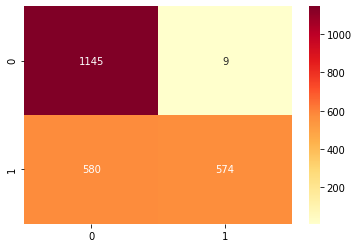

In [9]:
print("BOE: \n")
pred_boe = trainingdata(dfx_boe, dfy_boe,[50,50,50,50,50],'logistic',0.0000001,'adaptive',0.95,2500)
metrics(dfy_boe,pred_boe)
cfmatrix(dfy_boe,pred_boe)


MEAN: 

ACC:  77.59892689470155

               precision    recall  f1-score   support

           0       0.74      0.84      0.79      1491
           1       0.82      0.71      0.76      1491

    accuracy                           0.78      2982
   macro avg       0.78      0.78      0.77      2982
weighted avg       0.78      0.78      0.77      2982

Matriz de Confusão: 



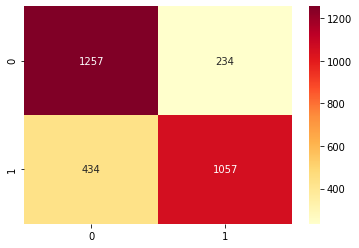

In [10]:
print("MEAN: \n")
pred_mean = trainingdata(dfx_mean, dfy_mean,[50,50,50,50,50],'logistic',0.0000001,'constant',0.90,2500)
metrics(dfy_mean,pred_mean)
cfmatrix(dfy_mean,pred_mean)

MEDIAN: 

ACC:  73.3065057008719

               precision    recall  f1-score   support

           0       0.66      0.97      0.78      1491
           1       0.95      0.49      0.65      1491

    accuracy                           0.73      2982
   macro avg       0.80      0.73      0.72      2982
weighted avg       0.80      0.73      0.72      2982

Matriz de Confusão: 



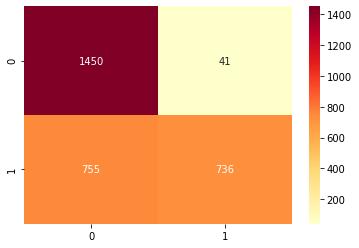

In [11]:
print("MEDIAN: \n")
pred_median = trainingdata(dfx_median, dfy_median,[50,50,50,50,50],'logistic',0.000001,'adaptive',0.95,3000)
metrics(dfy_median,pred_median)
cfmatrix(dfy_median,pred_median)

MOSTF: 

ACC:  74.84909456740442

               precision    recall  f1-score   support

           0       0.68      0.95      0.79      1491
           1       0.91      0.55      0.69      1491

    accuracy                           0.75      2982
   macro avg       0.80      0.75      0.74      2982
weighted avg       0.80      0.75      0.74      2982

Matriz de Confusão: 



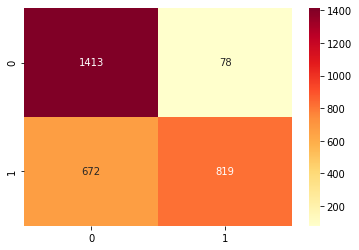

In [12]:
print("MOSTF: \n")
pred_mostf = trainingdata(dfx_mostf, dfy_mostf,[50,50,50,50,50],'logistic',0.0001,'adaptive',0.90,3000)
metrics(dfy_mostf,pred_mostf)
cfmatrix(dfy_mostf,pred_mostf)